# Measure differences, change plasticity

In [60]:
%pip install numpy
%pip install matplotlib
%pip install contourpy cycler fonttools importlib_resources kiwisolver matplotlib numpy packaging pillow pptree pyparsing python-dateutil scipy six zipp

210119.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


210125.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


210130.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [61]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
avgs = []
stds = []
areas = ["PHON", "VERB", "NOUN"]
x_vals = [0.01, 0.1, 0.2, 0.4, 0.6, 0.9, 1]
cat_noun_vals = []
cat_noun_stds = []
cat_verb_vals = []
cat_verb_stds = []
jump_noun_vals = []
jump_noun_stds = []
jump_verb_vals = []
jump_verb_stds = []
trial = 0



# calculate mean and standard deviation
for x_val in x_vals:
  cur_cat_noun_vals = []
  cur_cat_verb_vals = []
  cur_jump_noun_vals = []
  cur_jump_verb_vals = []
  for i in range(1):
    plasticity = 0.05
    LEX_k = 100

    steps = 30
    percent_neurons_destroyed = x_val
    cur_results = {"LEX_k": LEX_k, "steps": steps, "percent_neurons_destroted": percent_neurons_destroyed}
    brain = LearnBrain(plasticity, LEX_k=LEX_k)
    # Training the brain
    brain.train_simple(steps)
    cur_results["cat_res_pre_stroke"] = brain.test_word("CAT")
    cur_results["jump_res_pre_stroke"] = brain.test_word("JUMP")
    # Inducing a stroke
    brain.stroke(percent_neurons_destroyed=0.8, areas=areas)
    cur_results["cat_res_post_stroke"] = brain.test_word("CAT")
    cur_results["jump_res_post_stroke"] = brain.test_word("JUMP")
    # cur_cat_noun_vals.append(cur_results["cat_res_pre_stroke"]["noun_overlap"] - cur_results["cat_res_post_stroke"]["noun_overlap"])
    # cur_cat_verb_vals.append(cur_results["cat_res_pre_stroke"]["verb_overlap"] - cur_results["cat_res_post_stroke"]["verb_overlap"])

    # cur_jump_noun_vals.append(cur_results["jump_res_pre_stroke"]["noun_overlap"] - cur_results["jump_res_post_stroke"]["noun_overlap"])
    # cur_jump_verb_vals.append(cur_results["jump_res_pre_stroke"]["verb_overlap"] - cur_results["jump_res_post_stroke"]["verb_overlap"])

    # decrease_cat.append(cur_results["cat_res_pre_stroke"]["noun_overlap"] - cur_results["cat_res_post_stroke"]["noun_overlap"])
    # print(cur_results["cat_res_pre_stroke"]["noun_overlap"], cur_results["cat_res_post_stroke"]["noun_overlap"])
    # decrease_jump.append(cur_results["jump_res_pre_stroke"]["noun_overlap"] - cur_results["jump_res_post_stroke"]["verb_overlap"])

    # 'Healing' the brain
    # brain.train_simple(steps)
    # cur_results["cat_res_healed"] = brain.test_word_nums_only("CAT")
    # cur_results["jump_res_healed"] = brain.test_word_nums_only("JUMP")
    # heal_cat.append(cur_results["cat_res_post_stroke"]["noun_overlap"] - cur_results["cat_res_healed"]["noun_overlap"])
    # heal_jump.append(cur_results["jump_res_post_stroke"]["verb_overlap"] - cur_results["jump_res_healed"]["verb_overlap"])

    # results.append(cur_results)
  # means
  # cat_noun_vals.append(np.mean(cur_cat_noun_vals))
  # cat_verb_vals.append(np.mean(cur_cat_verb_vals))
  # jump_noun_vals.append(np.mean(cur_jump_noun_vals))
  # jump_verb_vals.append(np.mean(cur_jump_verb_vals))
  # # std
  # cat_noun_stds.append(np.std(cur_cat_noun_vals))
  # cat_verb_stds.append(np.std(cur_cat_verb_vals))
  # jump_noun_stds.append(np.std(cur_jump_noun_vals))
  # jump_verb_stds.append(np.std(cur_jump_verb_vals))

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5


KeyboardInterrupt: 

In [98]:
%load_ext autoreload
%autoreload 2
from learner import LearnBrain
plasticity = 0.05
LEX_k = 100

steps = 30
brain = LearnBrain(plasticity, LEX_k=LEX_k, num_nouns=5, num_verbs=5)
brain.stroke(percent_neurons_destroyed=0.90, areas=["NOUN", "VERB"])
brain.train(rounds=30)
# # Training the brain
brain.test_word("CAT")
brain.test_word("JUMP")
# # # Inducing a stroke
print("stroke")
brain.stroke(percent_neurons_destroyed=0.8, areas=["NOUN", "VERB"])
brain.test_word("CAT")
brain.test_word("JUMP")
print("healing")
brain.train_simple(steps)
brain.test_word("CAT")
brain.test_word("JUMP")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Computing total synaptic inputs from PHON -> NOUN and VERB...
Got input into VERB = 4512258.5
Got input into NOUN = 211810640000000.0
Firing NOUN and VERB recurrently, and computing overlap of winners at (t+1) with t
In NOUN: got 97 / 100 overlap.
In VERB: got 27 / 100 overlap.
Computing total synaptic inputs from PHON -> NOUN and VERB...
Got input into VERB = 5867854.5
Got input into NOUN = 218668850000000.0
Firing NOUN and VERB recurrently, and computing overlap of winners at (t+1) with t
In NOUN: got 98 / 100 overlap.
In VERB: got 20 / 100 overlap.
stroke
Computing total synaptic inputs from PHON -> NOUN and VERB...
Got input into VERB = 317

In [102]:
brain.test_word("GATO")


Computing total synaptic inputs from PHON -> NOUN and VERB...
Got input into VERB = 40123727000000.0
Got input into NOUN = 645885.6
Firing NOUN and VERB recurrently, and computing overlap of winners at (t+1) with t
In NOUN: got 84 / 100 overlap.
In VERB: got 19 / 100 overlap.


In [ ]:
brain2 = LearnBrain(plasticity, LEX_k=LEX_k)
brain2.train_simple(30)
brain.test_word("CORRER")


In [95]:
%load_ext autoreload
%autoreload 2
from learner import LearnBrain
plasticity = 0.05
LEX_k = 100

steps = 30
brain = LearnBrain(plasticity, LEX_k=LEX_k)
brain.stroke(percent_neurons_destroyed=0.98, areas=["NOUN", "VERB"])
brain.train_simple(rounds=30)
# # Training the brain
out = brain.test_noun("CAT")
print(out)
out = brain.test_verb("JUMP")
print(out)
# # # Inducing a stroke
print("stroke")
brain.stroke(percent_neurons_destroyed=0.75, areas=["NOUN", "VERB"])
out = brain.test_noun("CAT")
print(out)
print("healing")
for i in range(30):
  brain.train_simple(1)
  out = brain.test_noun("CAT")
  print(out)


# brain.test_word("JUMP")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
CAT
JUMP
stroke
Got non-assembly in PHON
None
healing
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in PHON
None
Round 0
Got non-assembly in 

In [96]:
brain.test_noun("DOG")

Got non-assembly in PHON


In [70]:
%load_ext autoreload
%autoreload 2
from learner import LearnBrain
plasticity = 0.05
LEX_k = 100

steps = 30
brain = LearnBrain(plasticity, LEX_k=LEX_k)
brain.train_simple(30)
# # Training the brain
brain.test_word("CAT")
brain.test_word("JUMP")
# # # Inducing a stroke
print("stroke")
brain.stroke(percent_neurons_destroyed=0.8, areas=["NOUN", "VERB"])
brain.test_word("CAT")
brain.test_word("JUMP")
print("healing")
brain.train_simple(steps)
brain.test_word("CAT")
brain.test_word("JUMP")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Computing total synaptic inputs from PHON -> NOUN and VERB...
Got input into VERB = 3482550.5
Got input into NOUN = 27896834.0
Firing NOUN and VERB recurrently, and computing overlap of winners at (t+1) with t
In NOUN: got 97 / 100 overlap.
In VERB: got 59 / 100 overlap.
Computing total synaptic inputs from PHON -> NOUN and VERB...
Got input into VERB = 26546766.0
Got input into NOUN = 642420.44
Firing NOUN and VERB recurrently, and computing overlap of winners at (t+1) with t
In NOUN: got 63 / 100 overlap.
In VERB: got 94 / 100 overlap.
stroke
Computing total synaptic inputs from PHON -> NOUN and VERB...
Got input into VERB = 1416328.4
Got inp

<BarContainer object of 7 artists>

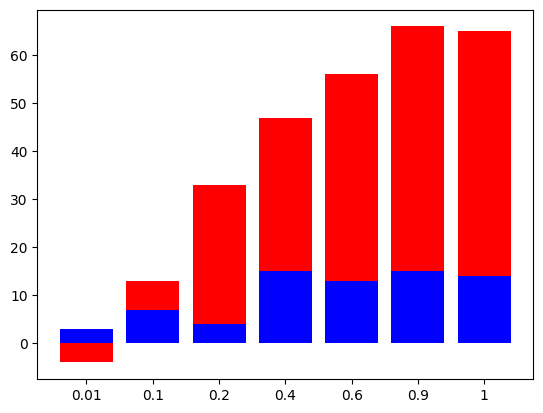

In [11]:
import matplotlib.pyplot as plt
x_val_str = [str(x_val) for x_val in x_vals]
plt.bar(x_val_str, cat_noun_vals, color="red")
plt.bar(x_val_str, cat_verb_vals, color="blue")

<BarContainer object of 7 artists>

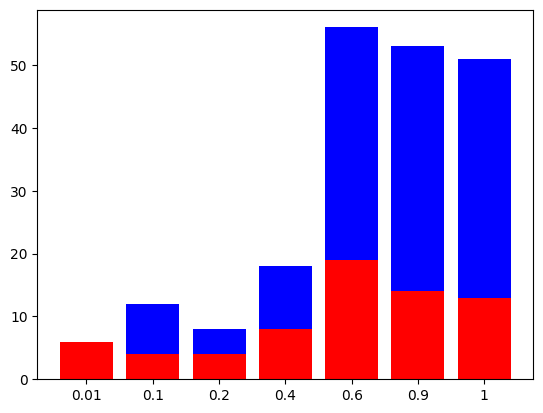

In [13]:
x_val_str = [str(x_val) for x_val in x_vals]
plt.bar(x_val_str, jump_verb_vals, color="blue")
plt.bar(x_val_str, jump_noun_vals, color="red")


In [5]:
print(cat_noun_vals)

[np.float64(6.0), np.float64(17.0), np.float64(21.0), np.float64(38.0), np.float64(54.0), np.float64(65.0), np.float64(63.0)]


In [80]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
avgs = []
stds = []
areas = ["NOUN", "VERB"]
words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
pre_stroke_average_ratio = 0
brain = LearnBrain(0.05, LEX_k=100)
x_vals = []
lex_only_results = []
brain.train_simple(30)
running = []
for word in words:
  res = brain.test_word_nums_only(word[0])
  running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))

lex_only_results.append(np.mean(running))

# pre_stroke_average_ratio /= len(words)
# brain.test_word("CAT")
percent_neurons_destroyed = 0.6
brain.stroke(percent_neurons_destroyed=percent_neurons_destroyed, areas=areas)


for i in range(30):
  brain.train_simple(1)
  running = []
  for word in words:
    res = brain.test_word_nums_only(word[0])
    running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
  lex_only_results.append(np.mean(running))

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0


[np.float64(0.9575), np.float64(0.43250000000000005), np.float64(0.495), np.float64(0.6225), np.float64(0.6874999999999999), np.float64(0.745), np.float64(0.7825), np.float64(0.8175000000000001), np.float64(0.855), np.float64(0.8725), np.float64(0.88), np.float64(0.9025000000000001), np.float64(0.9125), np.float64(0.9175), np.float64(0.92), np.float64(0.9249999999999999), np.float64(0.9275000000000001), np.float64(0.935), np.float64(0.9375), np.float64(0.9425000000000001), np.float64(0.9450000000000001), np.float64(0.9475), np.float64(0.95), np.float64(0.95), np.float64(0.95), np.float64(0.95), np.float64(0.9524999999999999), np.float64(0.9524999999999999), np.float64(0.9524999999999999), np.float64(0.9550000000000001), np.float64(0.9550000000000001)]


Text(0.5, 0, 'recovery steps')

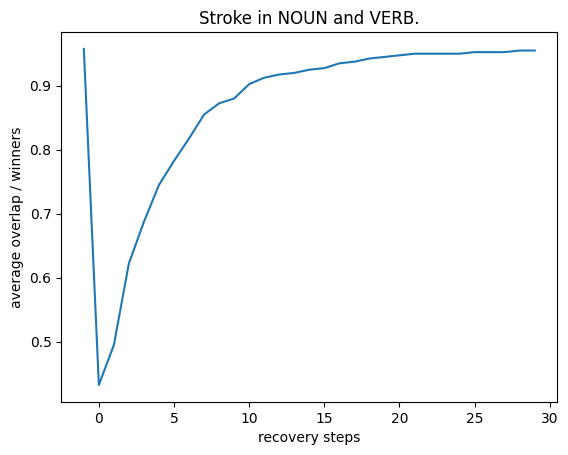

In [84]:
import matplotlib.pyplot as plt 
print(lex_only_results)
scaled_xvals = [i-1 for i in range(len(lex_only_results))]
plt.plot(scaled_xvals ,lex_only_results)
plt.title("Stroke in NOUN and VERB.")
plt.ylabel("average overlap / winners")
plt.xlabel("recovery steps")

[np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.9175)]


Text(0, 0.5, 'average for words overlap / winners')

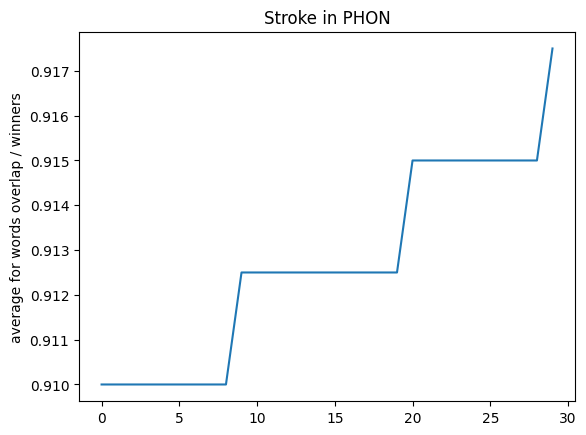

In [35]:
import matplotlib.pyplot as plt 
print(phon_only_results)
plt.plot(phon_only_results)
plt.title("Stroke in PHON")
plt.ylabel("average for words overlap / winners")

In [63]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
avgs = []
stds = []
areas = ["VISUAL"]
words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
stroke_vals = [0.01, 0.1, 0.2, 0.4, 0.5, 0.75, 0.9]
noun_decrease_results = []
verb_decrease_results = []
for sv in stroke_vals:
  brain = LearnBrain(0.05, LEX_k=100)
  brain.train_simple(30)
  before_vals = {}
  for word in words:
    res = brain.test_word_nums_only(word[0])
    # print(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]) )
    if word[1] == "noun":
      before_vals[word[0]] = res[f"{word[1]}_overlap"] - res[f"verb_overlap"]
    else:
      before_vals[word[0]] = res[f"{word[1]}_overlap"] / res[f"noun_overlap"]


  noun_results = []
  verb_results = []
  brain.stroke(percent_neurons_destroyed=sv, areas=areas)
  for word in words:
    res = brain.test_word_nums_only(word[0])
    if word[1] == "noun":
      # noun_results.append(res[f"noun_overlap"] - res[f"verb_overlap"] - before_vals[word[0]])
      noun_results.append(res[f"noun_overlap"] - res[f"verb_overlap"])

    else:
      # verb_results.append(res[f"verb_overlap"] - res[f"noun_overlap"] - before_vals[word[0]])
      verb_results.append(res[f"verb_overlap"] - res[f"noun_overlap"])


  noun_decrease_results.append(np.mean(noun_results))
  verb_decrease_results.append(np.mean(verb_results))
  # print(np.mean(noun_results), np.mean(verb_results))

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round

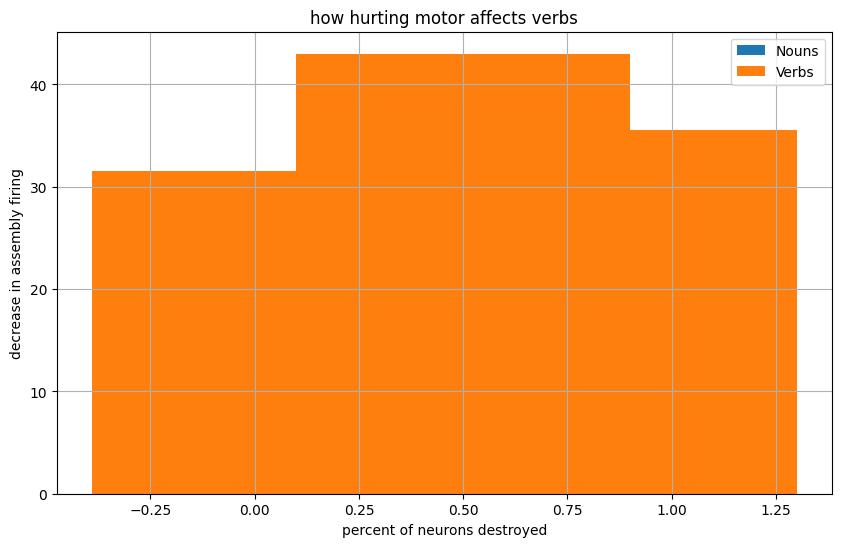

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your experiment
stroke_vals = [0.01, 0.1, 0.2, 0.4, 0.5, 0.75, 0.9]
noun_decrease_results = np.array(noun_decrease_results)
verb_decrease_results = np.array(verb_decrease_results)

# Calculate standard deviation (assuming you run multiple trials)
noun_std = np.std(noun_decrease_results) if len(noun_decrease_results) > 1 else 0
verb_std = np.std(verb_decrease_results) if len(verb_decrease_results) > 1 else 0

plt.figure(figsize=(10, 6))
# plt.errorbar(stroke_vals, noun_decrease_results, yerr=noun_std, label='Nouns', marker='o')
# plt.errorbar(stroke_vals, verb_decrease_results, yerr=verb_std, label='Verbs', marker='o')
plt.bar(stroke_vals, noun_decrease_results, label='Nouns', )
plt.bar(stroke_vals, verb_decrease_results,label='Verbs', )

plt.xlabel('percent of neurons destroyed')
plt.ylabel('decrease in assembly firing')
plt.title('how hurting motor affects verbs')
plt.legend()
plt.grid(True)
plt.show()

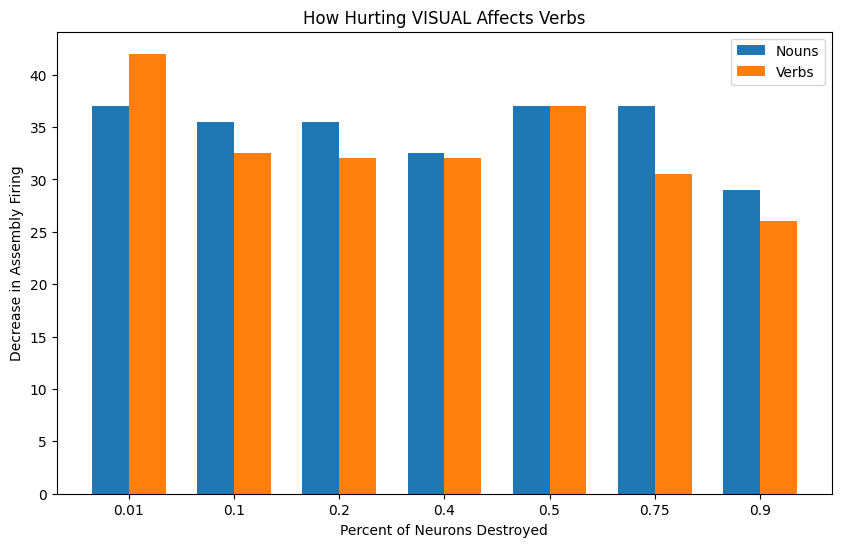

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your experiment
stroke_vals = [0.01, 0.1, 0.2, 0.4, 0.5, 0.75, 0.9]
noun_decrease_results = np.array(noun_decrease_results)
verb_decrease_results = np.array(verb_decrease_results)

# Calculate standard deviation
noun_std = np.std(noun_decrease_results) if len(noun_decrease_results) > 1 else 0
verb_std = np.std(verb_decrease_results) if len(verb_decrease_results) > 1 else 0

# Set width of bars and positions
bar_width = 0.35
x = np.arange(len(stroke_vals))

plt.figure(figsize=(10, 6))
# Plot bars side by side by adjusting their positions
plt.bar(x - bar_width/2, noun_decrease_results, bar_width, label='Nouns')
plt.bar(x + bar_width/2, verb_decrease_results, bar_width, label='Verbs')

# Customize x-axis
plt.xlabel('Percent of Neurons Destroyed')
plt.ylabel('Decrease in Assembly Firing')
plt.title('How Hurting VISUAL Affects Verbs')
plt.xticks(x, stroke_vals)  # Set the position and labels of x-ticks

plt.legend()
plt.show()

In [65]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
avgs = []
stds = []
areas = ["NOUN", "VERB"]
words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
stroke_vals = [0.01, 0.1, 0.2, 0.4, 0.5, 0.75, 0.9]
noise_results = []
for sv in stroke_vals:
  brain = LearnBrain(0.05, LEX_k=100)
  brain.train_simple(30)
  before_vals = {}
  for word in words:
    res = brain.test_word_nums_only(word[0])
    if word[1] == "noun":
      before_vals[word[0]] = res[f"{word[1]}_overlap"] / res[f"verb_overlap"]
    else:
      before_vals[word[0]] = res[f"{word[1]}_overlap"] / res[f"noun_overlap"]


  temp_results = []
  brain.stroke(percent_neurons_destroyed=sv, areas=areas)
  for word in words:
    res = brain.test_word_nums_only(word[0])
    if word[1] == "noun":
      temp_results.append(res[f"noun_overlap"] / res[f"verb_overlap"])

    else:
      temp_results.append(res[f"verb_overlap"] / res[f"noun_overlap"])


  noise_results.append(np.mean(temp_results))
  # print(np.mean(noun_results), np.mean(verb_results))

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round

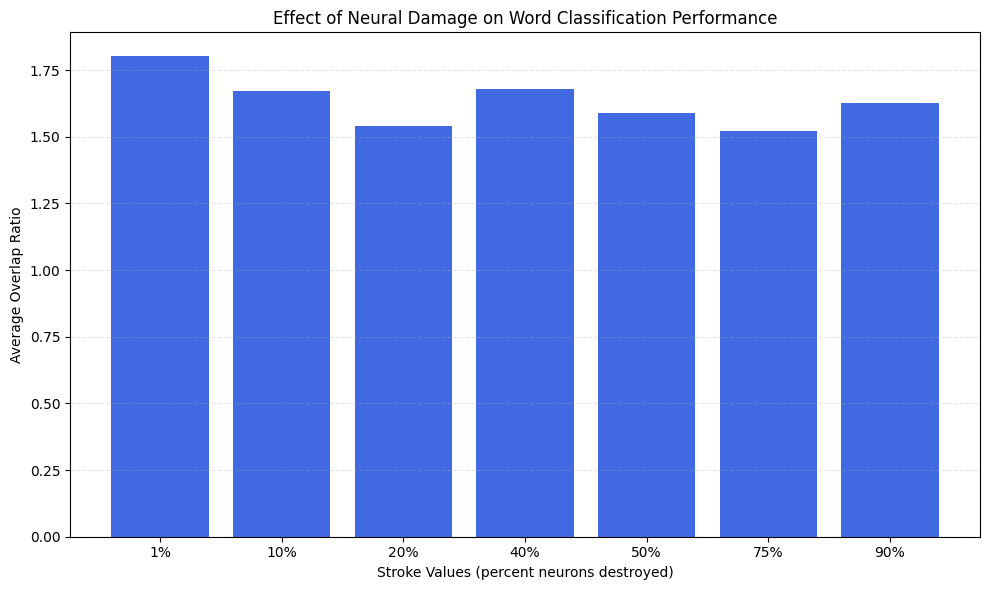

In [74]:
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar([str(int(x*100))+'%' for x in stroke_vals], noise_results, color='royalblue')

# Add labels and title
plt.xlabel('Stroke Values (percent neurons destroyed)')
plt.ylabel('Average Overlap Ratio')
plt.title('Effect of Neural Damage on Word Classification Performance')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29


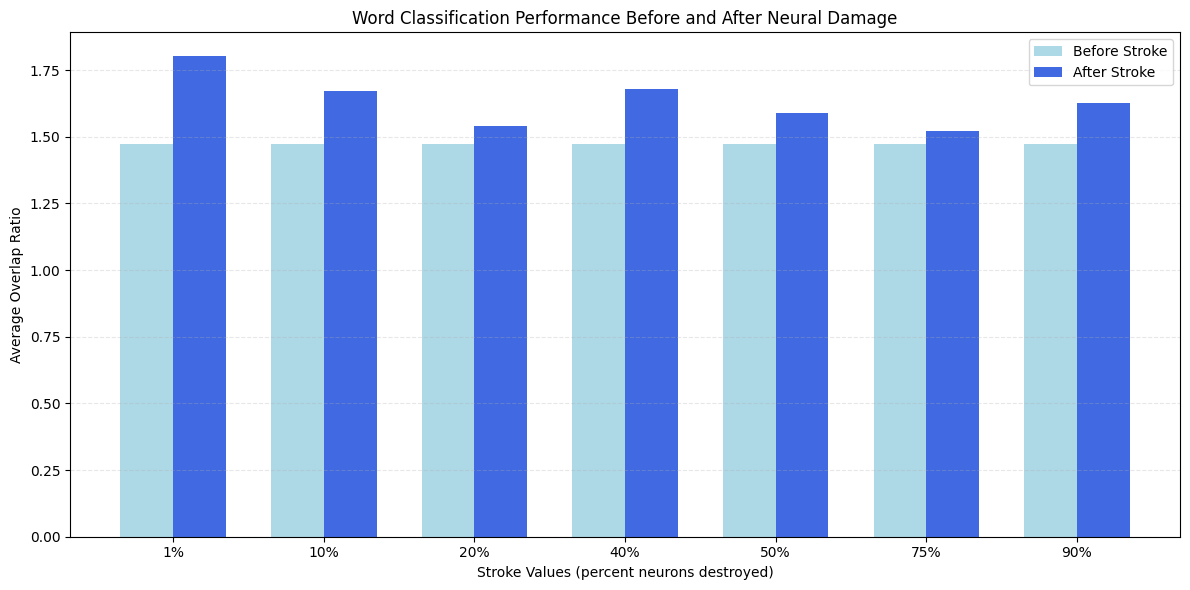

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Create arrays to store before and after results
before_stroke_results = []
after_stroke_results = noise_results

# Calculate average ratio before stroke for each stroke value
# (will be the same value repeated, but keeping the structure for plotting)
before_vals_list = []
brain = LearnBrain(0.05, LEX_k=100)
brain.train_simple(30)
for word in words:
    res = brain.test_word_nums_only(word[0])
    if word[1] == "noun":
        before_vals_list.append(res[f"noun_overlap"] / res[f"verb_overlap"])
    else:
        before_vals_list.append(res[f"verb_overlap"] / res[f"noun_overlap"])
baseline = np.mean(before_vals_list)
before_stroke_results = [baseline] * len(stroke_vals)

# Set up the bar positions
x = np.arange(len(stroke_vals))
width = 0.35

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, before_stroke_results, width, label='Before Stroke', color='lightblue')
plt.bar(x + width/2, after_stroke_results, width, label='After Stroke', color='royalblue')

# Add labels and title
plt.xlabel('Stroke Values (percent neurons destroyed)')
plt.ylabel('Average Overlap Ratio')
plt.title('Word Classification Performance Before and After Neural Damage')

# Format x-axis
plt.xticks(x, [f'{int(sv*100)}%' for sv in stroke_vals])

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [76]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
avgs = []
stds = []
areas = ["NOUN", "VERB"]
words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
stroke_vals = [0, 0.01, 0.1, 0.2, 0.4, 0.5, 0.75, 0.9]
results = []
for sv in stroke_vals:
  brain = LearnBrain(0.05, LEX_k=100)
  brain.train_simple(30)
  if sv == 0:
    temp_results = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      print(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]) )
      temp_results.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
    results.append(np.mean(temp_results))
  else:
    brain.stroke(percent_neurons_destroyed=sv, areas=areas)
    temp_results = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      temp_results.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
    results.append(np.mean(temp_results))

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
1.0
1.0
0.97
0.96
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round

In [ ]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
avgs = []
stds = []
areas = ["MOTOR"]
words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
stroke_vals = [0.01, 0.1, 0.2, 0.4, 0.5, 0.75, 0.9]
noun_decrease_results = []
verb_decrease_results = []
for sv in stroke_vals:

pre_stroke_average_ratio = 0
brain = LearnBrain(0.05, LEX_k=100)
brain.train_simple(30)
for word in words:
  res = brain.test_word_nums_only(word[0])
  brain.test_word(word[0])
  print(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]) )
  pre_stroke_average_ratio += res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"])

pre_stroke_average_ratio /= len(words)
brain.test_word("CAT")
percent_neurons_destroyed = 0.6
brain.stroke(percent_neurons_destroyed=percent_neurons_destroyed, areas=areas)

noun_results = []
for i in range(30):
  brain.train_simple(1)
  running_noun = []
  running_verb = []
  for word in words:
    res = brain.test_word_nums_only(word[0])
    running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
  phon_only_results.append(np.mean(running))

Text(0, 0.5, 'Ratio of Overlap in Relevant Area and the Winners')

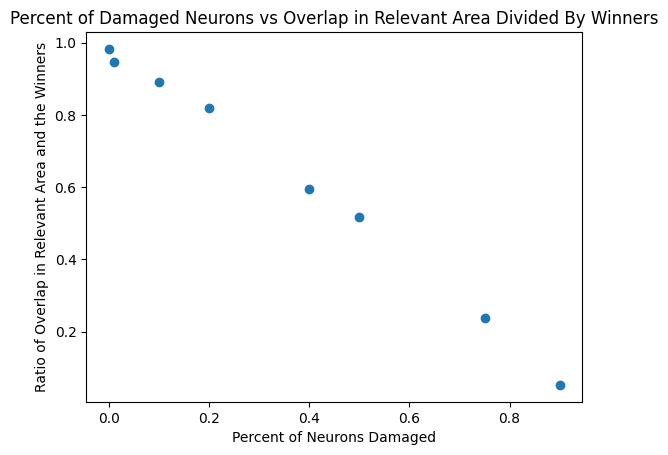

In [79]:
plt.plot(stroke_vals, results, "o")
plt.title("Percent of Damaged Neurons vs Overlap in Relevant Area Divided By Winners")
plt.xlabel("Percent of Neurons Damaged")
plt.ylabel("Ratio of Overlap in Relevant Area and the Winners")

In [104]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
stroke_severities = [0.01, 0.1, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99, 0.999]
total_sv_vals = []
for severity in stroke_severities:
  avgs = []
  stds = []
  areas = ["NOUN", "VERB"]
  words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
  pre_stroke_average_ratio = 0
  brain = LearnBrain(0.05, LEX_k=100)
  x_vals = []
  lex_only_results = []
  brain.train_simple(30)
  brain.stroke(percent_neurons_destroyed=0.95, areas=["NOUN", "VERB", "VISUAL", "MOTOR", "PHON"])
  running = []
  for word in words:
    res = brain.test_word_nums_only(word[0])
    running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
  
  lex_only_results.append(np.mean(running))

  brain.stroke(percent_neurons_destroyed=severity, areas=areas)


  for i in range(30):
    brain.train_simple(1)
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
    lex_only_results.append(np.mean(running))
  total_sv_vals.append(lex_only_results)

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0
Round 0


[np.float64(0.9400000000000001), np.float64(0.0975), np.float64(0.325), np.float64(0.6224999999999999), np.float64(0.7999999999999999), np.float64(0.8474999999999999), np.float64(0.865), np.float64(0.8575), np.float64(0.86), np.float64(0.8574999999999999), np.float64(0.8425), np.float64(0.8400000000000001), np.float64(0.84), np.float64(0.835), np.float64(0.8375), np.float64(0.845), np.float64(0.8474999999999999), np.float64(0.8475), np.float64(0.855), np.float64(0.855), np.float64(0.855), np.float64(0.8525), np.float64(0.8525), np.float64(0.855), np.float64(0.8575), np.float64(0.8624999999999999), np.float64(0.865), np.float64(0.865), np.float64(0.865), np.float64(0.8674999999999999), np.float64(0.865)]


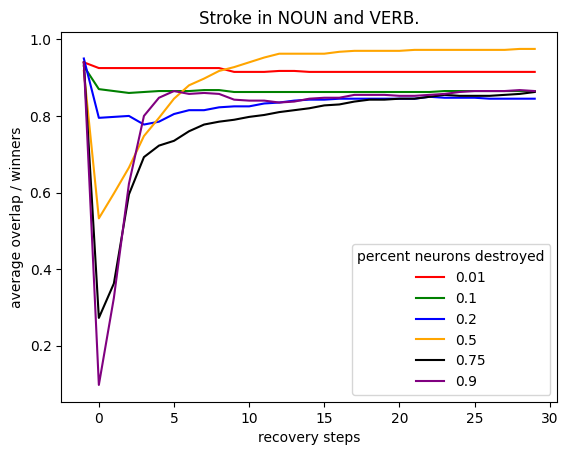

In [92]:
import matplotlib.pyplot as plt 
print(lex_only_results)
scaled_xvals = [i-1 for i in range(len(lex_only_results))]
colors = ["red", "green", "blue", "orange", "black", "purple", "pink"]
for i in range(len(total_vals)):
  plt.plot(scaled_xvals , total_vals[i], color=colors[i], label=f"{stroke_severities[i]}")
  plt.title("Stroke in NOUN and VERB.")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
print(lex_only_results)
scaled_xvals = [i-1 for i in range(len(total_sv_vals[0]))]
colors = ["red", "green", "blue", "orange", "black", "purple", "pink"]
for i in range(len(total_sv_vals)):
  plt.plot(scaled_xvals , total_sv_vals[i], color=colors[i], label=f"{stroke_severities[i]}")
  plt.title("Stroke in NOUN and VERB.")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()

In [100]:
from learner import LearnBrain
import numpy as np
# Word/part-of-speech acquisition experiments
plasticities = [0.001, 0.01, 0.05, 0.1]
# plasticities = [0.001, 0.01]

total_areas = ["PHON", "NOUN", "VERB", "MOTOR", "VISUAL"]
total_vals = []
for plasticity in plasticities:
  avgs = []
  stds = []
  areas = ["NOUN", "VERB"]
  words = [("CAT", "noun"), ("DOG", "noun"), ("JUMP", "verb"), ("RUN", "verb")]
  pre_stroke_average_ratio = 0
  brain = LearnBrain(0.05, LEX_k=100)
  x_vals = []
  lex_only_results = []
  brain.train_simple(30)
  running = []
  for word in words:
    res = brain.test_word_nums_only(word[0])
    running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
  
  lex_only_results.append(np.mean(running))

  brain.stroke(percent_neurons_destroyed=0.6, areas=areas)

  for a1 in total_areas:
    for a2 in total_areas:
      brain.update_plasticity(from_area=a1, to_area=a2, new_beta=plasticity)
  for i in range(30):
    brain.train_simple(1)
    running = []
    for word in words:
      res = brain.test_word_nums_only(word[0])
      running.append(res[f"{word[1]}_overlap"] / len(res[f"{word[1]}_winners"]))
    lex_only_results.append(np.mean(running))
  total_vals.append(lex_only_results)

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6


KeyboardInterrupt: 

[np.float64(0.9249999999999999), np.float64(0.8625), np.float64(0.9325), np.float64(0.9575), np.float64(0.97), np.float64(0.9775), np.float64(0.9775), np.float64(0.9775), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.98), np.float64(0.97), np.float64(0.9674999999999999), np.float64(0.9674999999999999)]


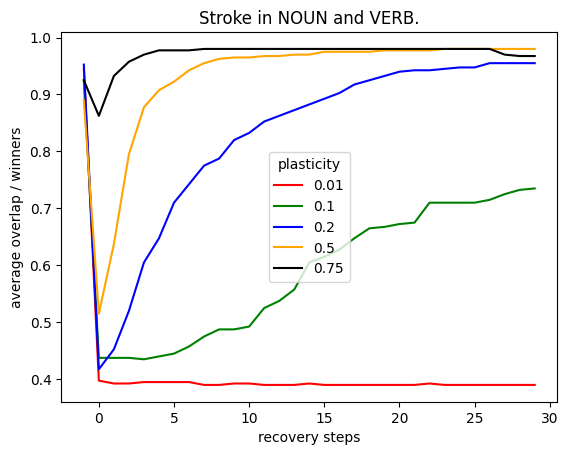

In [98]:
import matplotlib.pyplot as plt 
print(lex_only_results)
scaled_xvals = [i-1 for i in range(len(total_vals[0]))]
colors = ["red", "green", "blue", "orange", "black", "purple", "pink"]
for i in range(len(total_vals)):
  plt.plot(scaled_xvals , total_vals[i], color=colors[i], label=f"{stroke_severities[i]}")
  plt.title("Stroke in NOUN and VERB.")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="plasticity")
plt.show()

[np.float64(0.9425), np.float64(0.0675), np.float64(0.2675), np.float64(0.5900000000000001), np.float64(0.7925000000000001), np.float64(0.8875), np.float64(0.91), np.float64(0.9299999999999999), np.float64(0.9275), np.float64(0.9299999999999999), np.float64(0.9225), np.float64(0.925), np.float64(0.915), np.float64(0.91), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.9125), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.915), np.float64(0.915)]


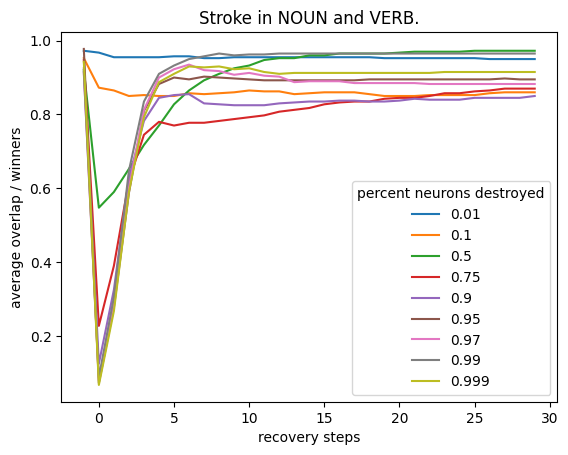

In [103]:
import matplotlib.pyplot as plt 
print(lex_only_results)
scaled_xvals = [i-1 for i in range(len(total_sv_vals[0]))]
colors = ["red", "green", "blue", "orange", "black", "purple", "pink"]
for i in range(len(total_sv_vals)):
  plt.plot(scaled_xvals , total_sv_vals[i], label=f"{stroke_severities[i]}")
  plt.title("Stroke in NOUN and VERB.")
  plt.ylabel("average overlap / winners")
  plt.xlabel("recovery steps")
plt.legend(title="percent neurons destroyed")
plt.show()